<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [281]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie Numpy
import numpy as np
#Importation de la librairie Matplotlib
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [283]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [286]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes.".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print("La colonne Zone est de nature", population.dtypes['Zone'], ",la colonne Année de nature", population.dtypes['Année'], ",et la colonne Valeur de nature", population.dtypes['Valeur'],".")
#Le nombre de valeurs présentes dans chacune des colonnes
print("La colonne Zone comporte", len(population['Zone']), "valeurs, la colonne Année", len(population['Année']), "valeurs et, la colonne Valeur en a", len(population['Valeur']), ".")

Le tableau comporte 3 colonnes.
La colonne Zone est de nature object ,la colonne Année de nature int64 ,et la colonne Valeur de nature float64 .
La colonne Zone comporte 1416 valeurs, la colonne Année 1416 valeurs et, la colonne Valeur en a 1416 .


In [287]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonnes.".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonnes.


In [288]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [289]:
#Nous allons harmoniser les unités.Pour cela, nous avons décidé de multiplier la population par 1000.
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000

In [290]:
#Changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [291]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [292]:
#Harmonisation des noms de pays avec un dictionnaire de correspondance 
correspondance = {
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "Royaume-Uni",
    "Tchéquie": "Tchéquie (la)" 
}
population['Zone'] = population['Zone'].replace(correspondance)

liste_pays = population['Zone'].unique()
print(liste_pays)

['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)'
 'Arabie saoudite' 'Argentine' 'Arménie' 'Aruba' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bonaire, Saint-Eustache et Saba'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Brunéi Darussalam' 'Bulgarie'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada'
 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, continentale' 'Chine, Taiwan Province de' 'Chypre' 'Colombie'
 'Comores' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Curaçao'
 'Danemark' 'Djibouti' 'Dominique' 'Égypte' 'El Salvador'
 'Émirats arabes unis' 'Équateur' 'Érythrée' 'Espagne' 'Estonie'
 'Eswatini' "États-Unis d'Amérique" 'Éthiopie' 'Fédération de Russie'
 'Fidji' 'Finlande' 'France' 'Gabon' 'Gambie' 'Géorgie

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [294]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes.".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonnes.


In [295]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes.".format(dispo_alimentaire.shape[1]))

Le tableau comporte 18 colonnes.


In [296]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [297]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [298]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_converties = [
    'Aliments pour animaux',
    'Autres Utilisations',
    'Disponibilité intérieure', 
    'Exportations - Quantité', 
    'Importations - Quantité', 
    'Nourriture', 
    'Pertes', 
    'Production', 
    'Semences', 
    'Traitement', 
    'Variation de stock'
]
# Multiplier les colonnes selectionnées par 1000 pour convertir les milliers de tonnes en kilogrammes.
dispo_alimentaire[colonnes_converties] = dispo_alimentaire[colonnes_converties] * 1000


In [299]:
#Affichage les 5 premières lignes de la table.
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [301]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes.".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonnes.


In [302]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes.".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonnes.


In [303]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [304]:
#Changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [305]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [306]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [308]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonnes.".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonnes.


In [309]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes.".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonnes.


In [310]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [311]:
#Harmonisation des noms de pays avec un dictionnaire de correspondance 
correspondance = {
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "Royaume-Uni",
    "Tchéquie": "Tchéquie (la)" 
}
sous_nutrition['Zone'] = sous_nutrition['Zone'].replace(correspondance)

liste_pays = sous_nutrition['Zone'].unique()
print(liste_pays)

['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie'
 'Australie' 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh'
 'Barbade' 'Bélarus' 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Brésil' 'Brunéi Darussalam' 'Bulgarie' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Chine, continentale'
 'Chine, Taiwan Province de' 'Chypre' 'Colombie' 'Comores' 'Congo'
 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Danemark' 'Djibouti'
 'Dominique' 'Égypte' 'El Salvador' 'Émirats arabes unis' 'Équateur'
 'Érythrée' 'Espagne' 'Estonie' 'Eswatini' "États-Unis d'Amérique"
 'Éthiopie' 'Fédération de Russie' 'Fidji' 'Finlande' 'France' 'Gabon'
 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grenade' 'Groenland' 'Guatemala'
 'Guinée' 'Guinée équatoriale' 'Guinée-Bis

In [312]:
#Conversion de la colonne sous nutrition en numérique
#sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])
#Affichage de la liste des pays dont les données de la colonne Valeur sont < à 0.1.
sous_nutrition[sous_nutrition.Valeur=='<0.1'].Zone.unique()

array(['Arménie', 'Barbade', 'Belize', 'Cabo Verde',
       'Chine - RAS de Macao', 'Chypre', 'Dominique', 'Fidji', 'Guyana',
       'Îles Salomon', 'Kiribati', 'Macédoine du Nord', 'Maurice',
       'Nouvelle-Calédonie', 'Polynésie française',
       'Saint-Vincent-et-les Grenadines', 'Samoa', 'Sao Tomé-et-Principe',
       'Suriname', 'Trinité-et-Tobago', 'Vanuatu'], dtype=object)

In [313]:
sous_nutrition.Valeur=='<0.1'

0       False
1       False
2       False
3       False
4       False
        ...  
1213    False
1214    False
1215    False
1216    False
1217    False
Name: Valeur, Length: 1218, dtype: bool

In [314]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)

In [315]:
#Changement du nom de la colonne Valeur par Sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'Sous_nutrition'}, inplace=True)
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [316]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] = (sous_nutrition['Sous_nutrition'] * 1000000)

In [317]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse de la sous nutrition dans le monde</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [320]:
# Objectif: faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# On filtre les données de la table population pour l'année 2017.
population_2017 = population[population['Année'] == 2017]
# On filtre les données de la table sous_nutrition contenant l'année 2017 dans les intervalles.
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] =='2016-2018']
# On effectue la jointure entre la table population et la table sous nutrition ne contenant que les données concernant l'année 2017 par la colonne commune Zone
# Cette nouvelle table se nomme pop_sous_nutr_2017
pop_sous_nutr_2017 = pd.merge(population_2017, sous_nutrition_2017, on='Zone', indicator=True, how='outer')
# On affiche les 5 premières lignes  de la table population sous nutrition 2017
pop_sous_nutr_2017.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,both
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,both
2,Albanie,2017,2884169.0,2016-2018,100000.0,both
3,Algérie,2017,41389189.0,2016-2018,1300000.0,both
4,Allemagne,2017,82658409.0,2016-2018,0.0,both


In [321]:
#Affichage des valeurs de la jointure
pop_sous_nutr_2017._merge.value_counts()

_merge
both          203
left_only      33
right_only      0
Name: count, dtype: int64

In [322]:
#affichage des lignes sans correspondance
pop_sous_nutr_2017[pop_sous_nutr_2017._merge=='left_only']

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge
7,Anguilla,2017,14584.0,NaN,NaN,left_only
9,Antilles néerlandaises (ex),2017,275186.0,NaN,NaN,left_only
13,Aruba,2017,105366.0,NaN,NaN,left_only
26,"Bonaire, Saint-Eustache et Saba",2017,25401.0,NaN,NaN,left_only
52,Curaçao,2017,161997.0,NaN,NaN,left_only
68,Gibraltar,2017,33728.0,NaN,NaN,left_only
72,Guadeloupe,2017,399672.0,NaN,NaN,left_only
73,Guam,2017,164281.0,NaN,NaN,left_only
79,Guyane française,2017,275191.0,NaN,NaN,left_only
105,Liechtenstein,2017,37800.0,NaN,NaN,left_only


In [323]:
#affichage uniquement des lignes ayant des correspondances
pop_sous_nutr_2017_filtree = pop_sous_nutr_2017[pop_sous_nutr_2017['_merge'] =='both']
pop_sous_nutr_2017_filtree.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,both
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,both
2,Albanie,2017,2884169.0,2016-2018,100000.0,both
3,Algérie,2017,41389189.0,2016-2018,1300000.0,both
4,Allemagne,2017,82658409.0,2016-2018,0.0,both


In [324]:
#Affichage du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(pop_sous_nutr_2017_filtree.shape[0]))
print("Le tableau comporte {} colonnes.".format(pop_sous_nutr_2017_filtree.shape[1]))

Le tableau comporte 203 observation(s) ou article(s)
Le tableau comporte 6 colonnes.


In [325]:
#Calcul du nombre de personnes en état de sous-nutrition en 2017
total_pop_sous_nutr_2017 = int(round(pop_sous_nutr_2017_filtree['Sous_nutrition'].sum())) 
print('La sous-nutrition touche', total_pop_sous_nutr_2017, 'personnes dans le monde en 2017.')
#Calcul de la population totale dans le monde en 2017
population_mondiale_2017 = int(round(pop_sous_nutr_2017_filtree['Population'].sum()))
print('En 2017, il y a', population_mondiale_2017, ' êtres humains sur terre.')
#Ratio de la population mondiale en état de sous_nutrition
ratio_pop_sous_nutri = round((total_pop_sous_nutr_2017 / population_mondiale_2017)*100, 2)
print('On en déduit que', ratio_pop_sous_nutri, ' % de la population mondiale est en état de sous nutrition en 2017.')

La sous-nutrition touche 535700000 personnes dans le monde en 2017.
En 2017, il y a 7543798779  êtres humains sur terre.
On en déduit que 7.1  % de la population mondiale est en état de sous nutrition en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personnes qui pourraient être nourries</h3>
</div>

In [327]:
#Combien mange en moyenne un être humain ?
#il faut 2500 kilocalories en moyenne par jour pour un être indivudu en bonne santé tous âges, tous sexes, et toutes activités confondues.
#Source => site internet mdsmanuals.com 
#https://www.msdmanuals.com/fr/accueil/multimedia/table/nombre-de-calories-n%C3%A9cessaires-estim%C3%A9-dapr%C3%A8s-l%C3%A2ge-le-sexe-et-le-niveau-dactivit%C3%A9-physique

In [328]:
#On fait une jointure entre les tables population_2017 et dispo_alimentaire afin d'ajouter dans ce dernier la population.
dispo_alim_pop = pd.merge(dispo_alimentaire, population_2017, on='Zone', indicator=True, how='outer')

In [329]:
#Affichage du nouveau dataframe
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alim_pop.shape[0]))
print("Le tableau comporte {} colonnes.".format(dispo_alim_pop.shape[1]))

Le tableau comporte 15667 observation(s) ou article(s)
Le tableau comporte 21 colonnes.


In [330]:
#Affichage des valeurs de la jointure
dispo_alim_pop._merge.value_counts()

_merge
both          15605
right_only       62
left_only         0
Name: count, dtype: int64

In [331]:
#affichage des lignes sans correspondance
dispo_alim_pop[dispo_alim_pop._merge=='right_only']

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,_merge
435,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,77001.0,right_only
516,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,14584.0,right_only
608,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,275186.0,right_only
886,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,105366.0,right_only
1258,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1494076.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,58058.0,right_only
15663,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,37115.0,right_only
15664,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,104751.0,right_only
15665,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,29577.0,right_only


In [332]:
#On filtre les données pour n'afficher que les lignes comprennant des correspondances
dispo_alim_pop_filtree = dispo_alim_pop[dispo_alim_pop['_merge'] =='both']


In [333]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alim_pop_filtree = dispo_alim_pop_filtree.copy()
dispo_alim_pop_filtree.loc[:,'dispo_kcal'] = dispo_alim_pop_filtree['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim_pop_filtree['Population']
dispo_kcal_mondiale = int(round (dispo_alim_pop_filtree['dispo_kcal'].sum()))
print("Il y a", dispo_kcal_mondiale, "kcal disponibles au niveau mondial par jour.")

Il y a 21182162746926 kcal disponibles au niveau mondial par jour.


In [334]:
#Afficher les 5 premières lignes de la table
dispo_alim_pop_filtree.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,_merge,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,...,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113.0,both,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,...,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0,both,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,...,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,...,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,145184452.0


In [335]:
#Calcul du nombre d'humains pouvant être nourris
besoin_kcal_humain_jour = 2500
nb_humains_nourris = int(round(dispo_kcal_mondiale ) / (besoin_kcal_humain_jour))
print(nb_humains_nourris, "êtres humains peuvent être nourris au niveau mondial par jour.")

8472865098 êtres humains peuvent être nourris au niveau mondial par jour.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [337]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_vegetale = dispo_alim_pop_filtree[dispo_alim_pop_filtree['Origine'] == 'vegetale']
#Afficher les 5 premières lignes de la table
dispo_vegetale.head(15)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,_merge,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,...,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0,both,3.629611e+07
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,...,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,3.629611e+07
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,...,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,1.451845e+08
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,...,3000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,...,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0,2017,36296113.0,both,4.968938e+10
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
10,Afghanistan,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00


In [338]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_kcal_vegetale_mondiale = int(round(dispo_vegetale['dispo_kcal'].sum()))
print("Il y a", dispo_kcal_vegetale_mondiale, "kcal d'origine végétale disponibles au niveau mondial par jour en 2017.")

Il y a 17449509418936 kcal d'origine végétale disponibles au niveau mondial par jour en 2017.


In [339]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
besoin_kcal_humain_jour = 2500
nb_humains_nourris_alim_veg= int(round(dispo_kcal_vegetale_mondiale ) / (besoin_kcal_humain_jour))
print(nb_humains_nourris_alim_veg, "personnes peuvent être nourris par des aliments de type végétales au niveau mondial par jour en 2017.")

6979803767 personnes peuvent être nourris par des aliments de type végétales au niveau mondial par jour en 2017.


In [340]:
#Cacul de la proportion de la population mondiale pouvant etre nourrie uniquement avec les végétaux
proportion_pop_nourrie_vegetaux = round((nb_humains_nourris_alim_veg / population_mondiale_2017)*100, 2)
print('Les kcal végétales permettent théoriquement de nourrir', proportion_pop_nourrie_vegetaux, "% de la population mondiale en 2017.")

Les kcal végétales permettent théoriquement de nourrir 92.52 % de la population mondiale en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [342]:
#Calcul de la disponibilité totale
disp_int_totale = int(round(dispo_alim_pop_filtree['Disponibilité intérieure'].sum()))
print('La disponibilité intérieure totale est de ', disp_int_totale, 'kg.')

La disponibilité intérieure totale est de  9848994000 kg.


In [343]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes,
#nourritures, Semences, Traitement, et autres utilisations
colonnes_cibles = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
for utilisation in colonnes_cibles:
    dispo = int(round(dispo_alim_pop_filtree[utilisation].sum()))  
    print(utilisation, ":", dispo)

Aliments pour animaux : 1304245000
Pertes : 453698000
Nourriture : 4876258000
Semences : 154681000
Traitement : 2204687000
Autres Utilisations : 865023000


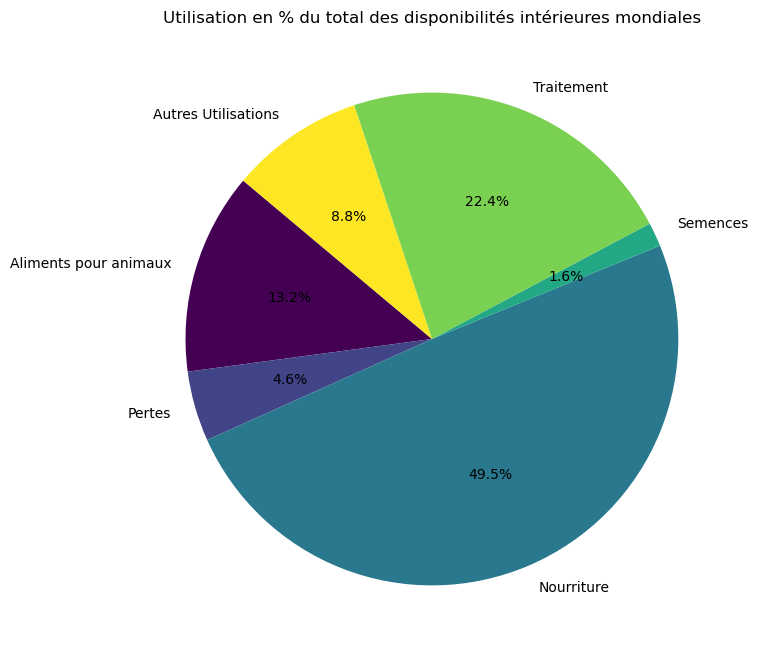

In [344]:
# Création d'un graphique circulaire pour représenter la proportion de chaque type d'utilisation de la disponibilité intérieure mondiale.
#Préparation des données
colonnes_cibles = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
valeurs_disponibles = []
couleurs = plt.cm.viridis(np.linspace(0, 1, len(colonnes_cibles)))
# Accumulation des valeurs
for utilisation in colonnes_cibles:
    dispo = int(round(dispo_alim_pop_filtree[utilisation].sum()))
    valeurs_disponibles.append(dispo)

# Création de l'histogramme
plt.figure(figsize=(8, 8))
plt.pie(valeurs_disponibles, labels=colonnes_cibles, autopct='%1.1f%%', startangle=140, colors=couleurs)
plt.axis()
plt.title("Utilisation en % du total des disponibilités intérieures mondiales")
plt.savefig("camembert.png")
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [346]:
#Création d'une liste avec toutes les variables
print(dispo_vegetale['Produit'].unique())

['Agrumes, Autres' 'Aliments pour enfants' 'Ananas' 'Bananes' 'Bière'
 'Blé' 'Boissons Alcooliques' 'Café' 'Coco (Incl Coprah)'
 'Céréales, Autres' 'Dattes' 'Edulcorants Autres' 'Feve de Cacao'
 'Fruits, Autres' 'Graines de coton' 'Graines de tournesol'
 'Huil Plantes Oleif Autr' 'Huile Graines de Coton' "Huile d'Arachide"
 "Huile d'Olive" 'Huile de Colza&Moutarde' 'Huile de Palme'
 'Huile de Soja' 'Huile de Sésame' 'Huile de Tournesol' 'Légumes, Autres'
 'Légumineuses Autres' 'Maïs' 'Miel' 'Millet' 'Miscellanees' 'Noix'
 'Olives' 'Oranges, Mandarines' 'Orge' 'Plantes Oleiferes, Autre' 'Poivre'
 'Pommes' 'Pommes de Terre' 'Raisin' 'Riz (Eq Blanchi)' 'Sucre Eq Brut'
 'Sucre, betterave' 'Sucre, canne' 'Sésame' 'Thé' 'Tomates' 'Vin'
 'Épices, Autres' 'Alcool, non Comestible' 'Arachides Decortiquees'
 'Avoine' 'Bananes plantains' 'Boissons Fermentés' 'Citrons & Limes'
 'Girofles' 'Graines Colza/Moutarde' 'Haricots' 'Huile de Coco'
 'Huile de Germe de Maïs' 'Huile de Palmistes' 'Ignames' 'M

In [347]:
#Création d'un dataframe avec les informations uniquement pour les céréales.
cereales = [
    'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'
]
dispo_cereales = dispo_vegetale[dispo_vegetale['Produit'].isin(cereales)]
#Affichage des 5 premières lignes.
dispo_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,_merge,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,...,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0,2017,36296113.0,both,4.968938e+10
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,both,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,...,76000.0,31000.0,312000.0,5000.0,0.0,0.0,2017,36296113.0,both,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,...,12000.0,1000.0,13000.0,0.0,0.0,0.0,2017,36296113.0,both,1.088883e+08
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,...,89000.0,52000.0,514000.0,22000.0,0.0,0.0,2017,36296113.0,both,9.436989e+08


In [348]:
#Affichage du total production d'alimentation animale
total_cereales_pour_animaux = int(round(dispo_cereales['Aliments pour animaux'].sum()))
print("La production totale de céréales destinées à l'alimentation animale est de ", (total_cereales_pour_animaux), "kg.")


La production totale de céréales destinées à l'alimentation animale est de  873535000 kg.


In [349]:
#Affichage du total production de nourriture
total_cereales_pour_nourriture = int(round(dispo_cereales['Nourriture'].sum()))
print("La production totale de céréales destinées à la nourriture est de ", (total_cereales_pour_nourriture), "kg.")

La production totale de céréales destinées à la nourriture est de  1029010000 kg.


In [350]:
#Affichage de la proportion d'alimentation animale
quantite_cereales_totales = int(round(dispo_cereales['Disponibilité intérieure'].sum()))
print("La quantité totale de céréales disponibles est de", quantite_cereales_totales, "kg.")
proportion_alim_animal_de_total_quantite_cereale = round((total_cereales_pour_animaux / quantite_cereales_totales)*100, 2)
print("La proportion d'alimentation animale dans la quantité totale de céréales disponibles est de ", proportion_alim_animal_de_total_quantite_cereale, "%")

La quantité totale de céréales disponibles est de 2406999000 kg.
La proportion d'alimentation animale dans la quantité totale de céréales disponibles est de  36.29 %


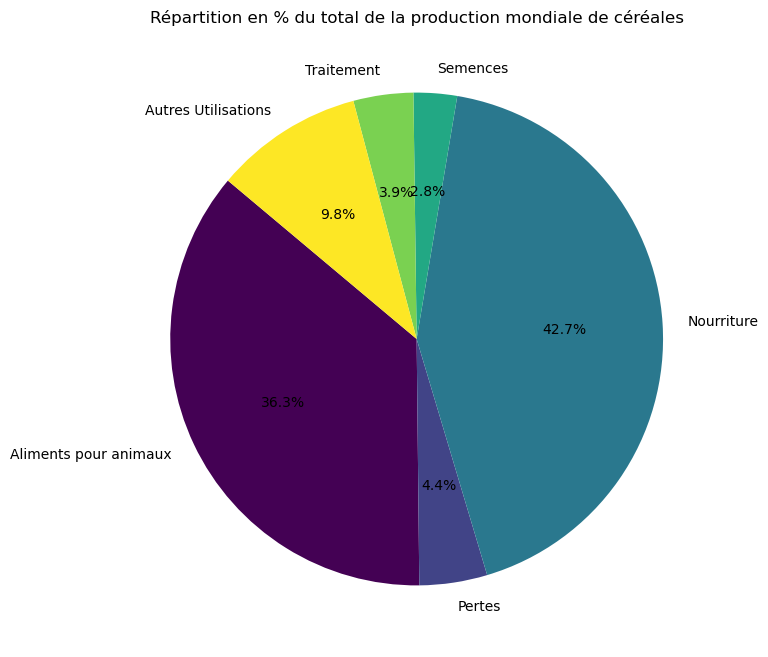

In [351]:
# Création d'un graphique circulaire pour représenter la proportion de chaque type d'utilisation de la disponibilié mondiale de céréales.
#Préparation des données
colonnes_cibles = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']
valeurs_disponibles = []
couleurs = plt.cm.viridis(np.linspace(0, 1, len(colonnes_cibles)))
# Accumulation des valeurs
for repartition in colonnes_cibles:
    dispo = int(round(dispo_cereales[repartition].sum()))
    valeurs_disponibles.append(dispo)

# Création de l'histogramme
plt.figure(figsize=(8, 8))
plt.pie(valeurs_disponibles, labels=colonnes_cibles, autopct='%1.1f%%', startangle=140, colors=couleurs )
plt.axis()
plt.title("Répartition en % du total de la production mondiale de céréales")
plt.savefig("camembert4.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [353]:
#Création de la colonne proportion par pays
pop_sous_nutr_2017_filtree= pop_sous_nutr_2017_filtree.copy()
pop_sous_nutr_2017_filtree.loc[:, 'Proportion_par_pays'] = round((pop_sous_nutr_2017_filtree['Sous_nutrition']/pop_sous_nutr_2017_filtree['Population'])*100, 2)

In [354]:
#Tri et affichage des 10 pays dont la proportion de population en état de sous nutrition est la plus élévée.
top_10_pays_sous_nutr_2017 = pop_sous_nutr_2017_filtree.sort_values(by='Proportion_par_pays', ascending=False).head(10)
top_10_pays_sous_nutr_2017.head(10)

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays
81,Haïti,2017,10982366.0,2016-2018,5300000.0,both,48.26
165,République populaire démocratique de Corée,2017,25429825.0,2016-2018,12000000.0,both,47.19
109,Madagascar,2017,25570512.0,2016-2018,10500000.0,both,41.06
104,Libéria,2017,4702226.0,2016-2018,1800000.0,both,38.28
100,Lesotho,2017,2091534.0,2016-2018,800000.0,both,38.25
197,Tchad,2017,15016753.0,2016-2018,5700000.0,both,37.96
157,Rwanda,2017,11980961.0,2016-2018,4200000.0,both,35.06
126,Mozambique,2017,28649018.0,2016-2018,9400000.0,both,32.81
200,Timor-Leste,2017,1243258.0,2016-2018,400000.0,both,32.17
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,both,28.93


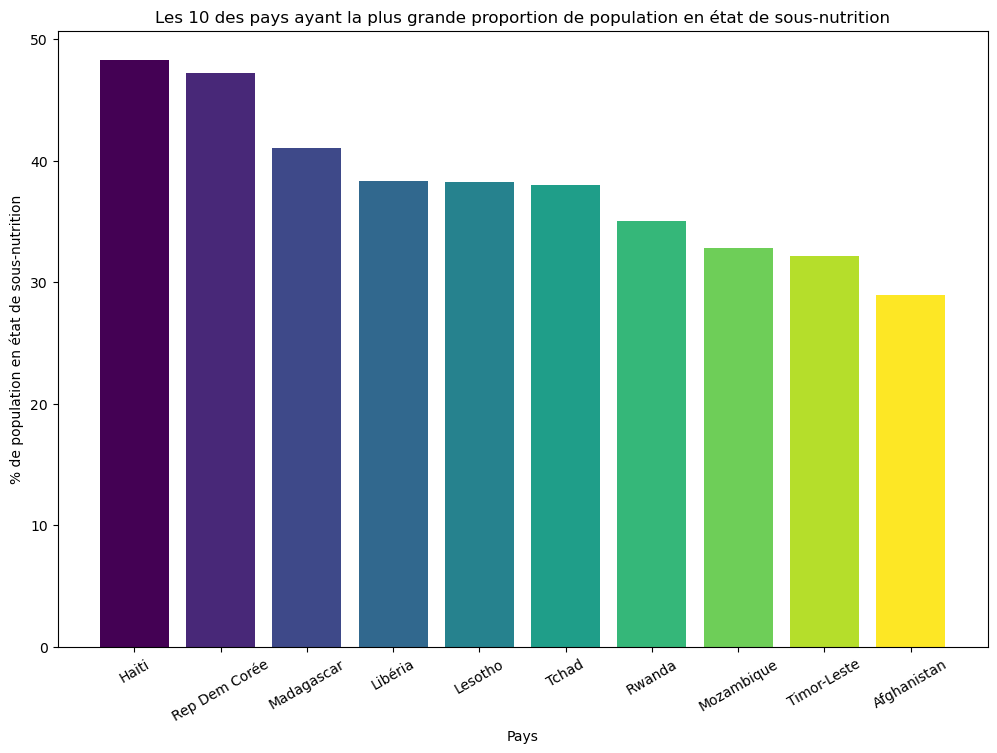

In [355]:
#Réalisation d'un diagramme representant les proportions pour ces 10 pays.
data = top_10_pays_sous_nutr_2017
#Liste de noms modifiés pour le diagramme
noms_pays_modifies = ['Haiti', 'Rep Dem Corée', 'Madagascar', 
                 'Libéria', 'Lesotho', 'Tchad', 'Rwanda',
                 'Mozambique', 'Timor-Leste', 'Afghanistan']
couleurs = plt.cm.viridis(np.linspace(0, 1, len(top_10_pays_sous_nutr_2017)))
plt.figure(figsize=(12, 8))
plt.bar(noms_pays_modifies, top_10_pays_sous_nutr_2017['Proportion_par_pays'], color=couleurs)
plt.title('Les 10 des pays ayant la plus grande proportion de population en état de sous-nutrition')
plt.xlabel('Pays')
plt.ylabel('% de population en état de sous-nutrition')
plt.xticks(rotation=30)
plt.savefig("diag_sous_nutr1.png")
plt.show()

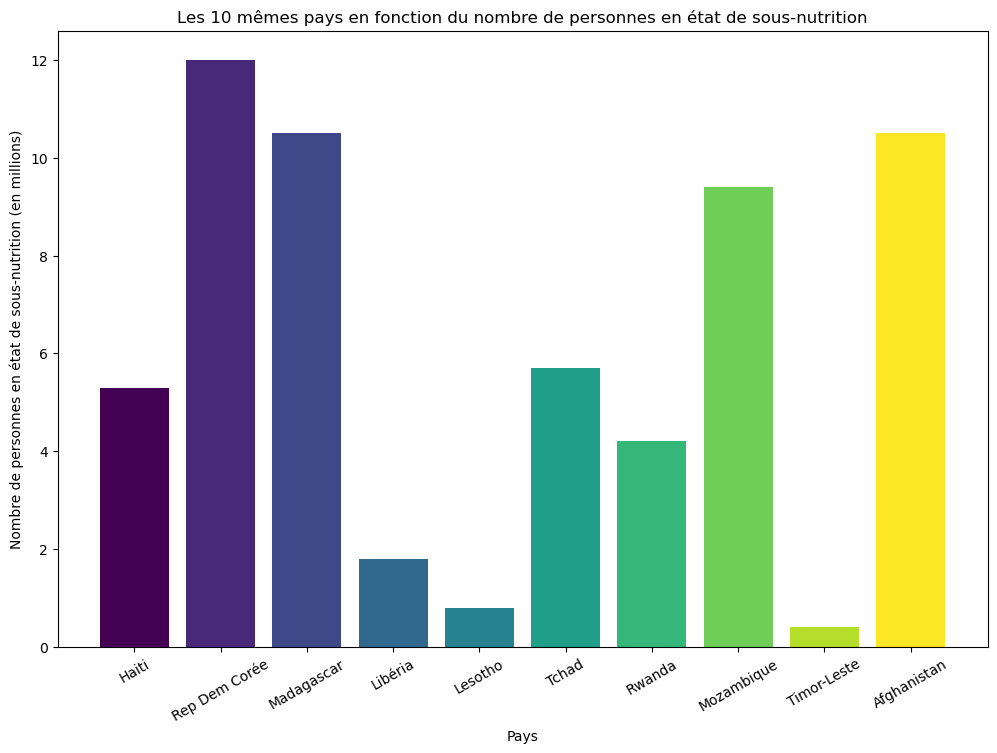

In [356]:
#Affichage de ces pays sur un autre diagramme en prennant en compte le total de population touchées.
top_10_pays_sous_nutr_2017 = pop_sous_nutr_2017_filtree.sort_values(by='Proportion_par_pays', ascending=False).head(10)
data = top_10_pays_sous_nutr_2017
#Liste de noms modifiés pour le diagramme
noms_pays_modifies = ['Haiti', 'Rep Dem Corée', 'Madagascar', 
                 'Libéria', 'Lesotho', 'Tchad', 'Rwanda',
                 'Mozambique', 'Timor-Leste', 'Afghanistan']
nombre_en_millions = top_10_pays_sous_nutr_2017['Sous_nutrition'] / 1_000_000
couleurs = plt.cm.viridis(np.linspace(0, 1, len(top_10_pays_sous_nutr_2017)))
plt.figure(figsize=(12, 8))
plt.bar(noms_pays_modifies, nombre_en_millions, color=couleurs)
plt.title('Les 10 mêmes pays en fonction du nombre de personnes en état de sous-nutrition')
plt.xlabel('Pays')
plt.ylabel('Nombre de personnes en état de sous-nutrition (en millions)')
plt.xticks(rotation=30)
plt.savefig("Diag_top_10_sous_nutr2.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [358]:
#calcul du total de l'aide alimentaire par pays:
total_aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

In [359]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_10_pays_plus_aidé = total_aide_par_pays.sort_values(by='Valeur', ascending=False).head(10)
top_10_pays_plus_aidé.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


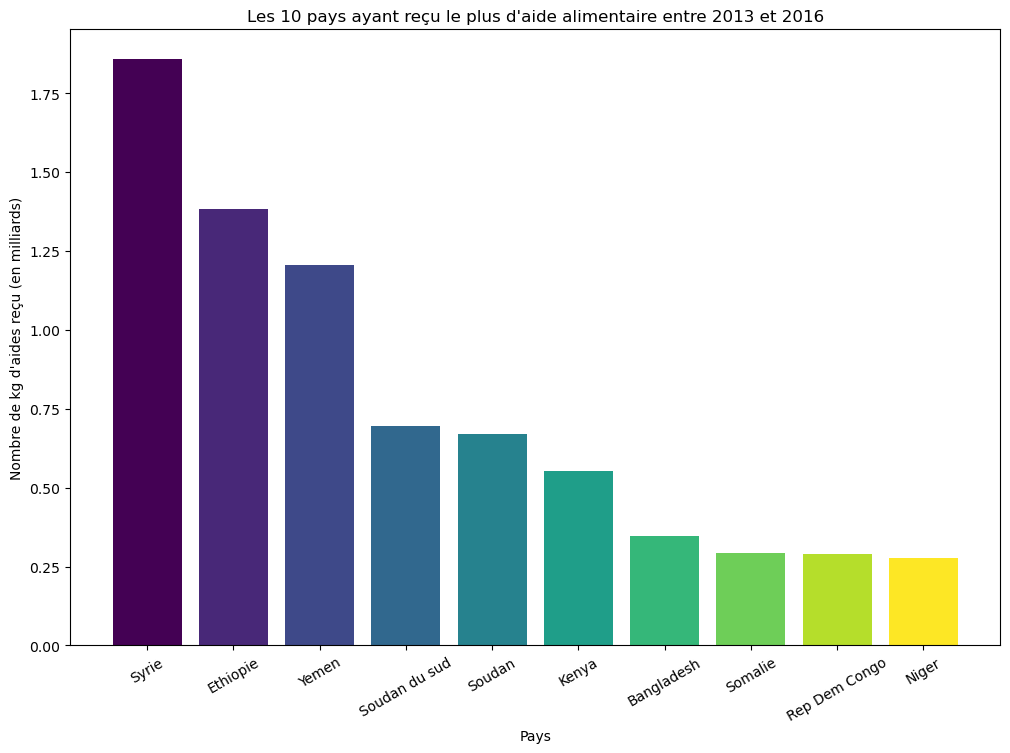

In [360]:
#Création d'un diagramme
top_10_pays_plus_aidé = total_aide_par_pays.sort_values(by='Valeur', ascending=False).head(10)
data = top_10_pays_plus_aidé
#Liste de noms modifiés pour le diagramme
noms_pays_aides = ['Syrie', 'Ethiopie', 'Yemen', 
                 'Soudan du sud', 'Soudan', 'Kenya',
                 'Bangladesh', 'Somalie', 'Rep Dem Congo', 'Niger']
nombre_en_milliards = top_10_pays_plus_aidé['Valeur'] / 1_000_000_000
couleurs = plt.cm.viridis(np.linspace(0, 1, len(top_10_pays_plus_aidé)))
plt.figure(figsize=(12, 8))
plt.bar(noms_pays_aides, nombre_en_milliards, color=couleurs)
plt.title("Les 10 pays ayant reçu le plus d'aide alimentaire entre 2013 et 2016")
plt.xlabel('Pays')
plt.ylabel("Nombre de kg d'aides reçu (en milliards)")
plt.xticks(rotation=30)
plt.savefig("Diag_top_aide.png")
plt.show()

In [361]:
#Total aides alimentaires reçues par les différents pays du monde entre 2013 et 2016.
total_aide_alim_mondiale = total_aide_par_pays['Valeur'].sum()
print("Entre 2013 et 2016, les pays en difficultés ont reçu",  total_aide_alim_mondiale,"kg d'aide alimentaire.")

Entre 2013 et 2016, les pays en difficultés ont reçu 11035901000 kg d'aide alimentaire.


In [362]:
total_aide_top_10 = top_10_pays_plus_aidé['Valeur'].sum()
print("L'aide totale perçue par les 10 pays en recevant le plus est de", total_aide_top_10, 'kg entre 2013 et 2016.')

L'aide totale perçue par les 10 pays en recevant le plus est de 7570301000 kg entre 2013 et 2016.


In [363]:
proportion_top_10_aide = round((total_aide_top_10 / total_aide_alim_mondiale) *100, 2)
print(proportion_top_10_aide, "% de l'aide alimentaire distribuée dans le monde de 2013 à 2016 a été à destination de ces 10 pays.")

68.6 % de l'aide alimentaire distribuée dans le monde de 2013 à 2016 a été à destination de ces 10 pays.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [365]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année aide_alimentaire('Zone','Année','Valeur')
aide_alim = aide_alimentaire.drop(columns='Produit')
aide_alim_par_pays = aide_alim.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
aide_alim_par_pays.head()


,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [366]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
Top_5 = top_10_pays_plus_aidé.sort_values('Valeur', ascending=False).head(5)
liste_5_pays_plus_aides = Top_5['Zone'].tolist()
print("Les 5 pays ayant reçu le plus d'aides alimentaires entre 2013 et 2016 sont:", liste_5_pays_plus_aides, ".")

Les 5 pays ayant reçu le plus d'aides alimentaires entre 2013 et 2016 sont: ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan'] .


In [367]:
#On filtre sur le dataframe avec notre liste
aide_alim_top5_par_année = aide_alim_par_pays[aide_alim_par_pays['Zone'].isin(liste_5_pays_plus_aides)]

In [368]:
# Affichage des pays avec l'aide alimentaire par année
aide_alim_top5_par_année.head(20)

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


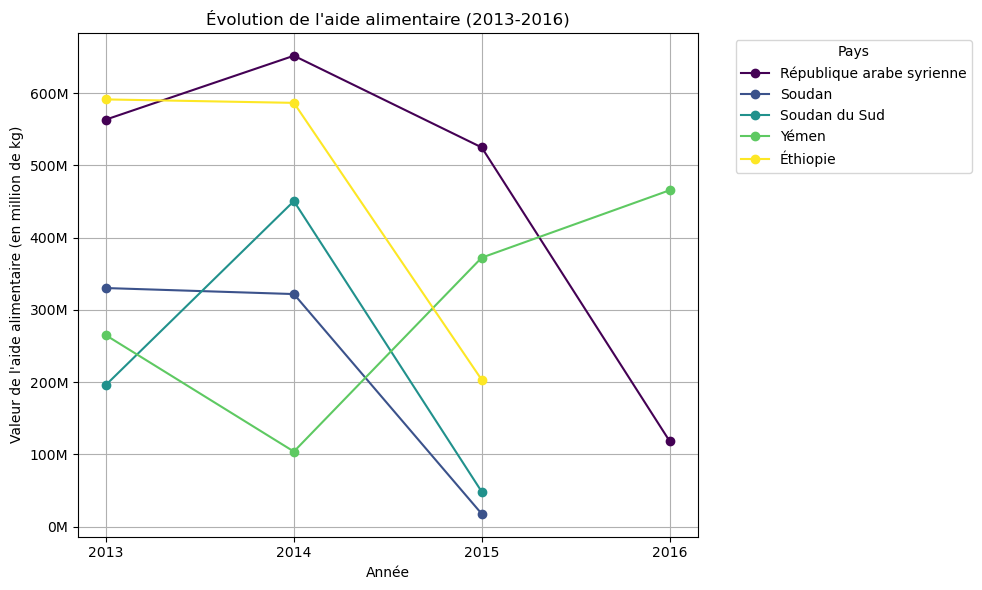

In [369]:
#Afficher les données d'évolution sur un graphique:
from matplotlib.ticker import FuncFormatter
# Créer un pivot pour faciliter la visualisation
aide_alim_top5_par_année_pivot = aide_alim_top5_par_année.pivot(index='Année', columns='Zone', values='Valeur')

# Définir les couleurs
couleurs = plt.cm.viridis(np.linspace(0, 1, len(aide_alim_top5_par_année_pivot.columns)))

# Tracer le graphique
plt.figure(figsize=(10, 6))
for i, column in enumerate(aide_alim_top5_par_année_pivot.columns):
    plt.plot(aide_alim_top5_par_année_pivot.index, aide_alim_top5_par_année_pivot[column], marker='o', label=column, color=couleurs[i])

plt.title("Évolution de l'aide alimentaire (2013-2016)")
plt.xlabel('Année')
plt.ylabel("Valeur de l'aide alimentaire (en million de kg)")
plt.xticks(aide_alim_top5_par_année_pivot.index)  # Pour afficher toutes les années sur l'axe des x

# Formater l'axe des y pour afficher les valeurs en millions
formatter = FuncFormatter(lambda x, _: f'{int(x / 1_000_000)}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('evo_5_pays_plus_aidealim.png')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [371]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_par_personne_par_jour_par_pays = dispo_alim_pop_filtree.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

In [372]:
#Filtre des pays sans données
dispo_kcal_par_personne_par_jour_par_pays_filtré = dispo_kcal_par_personne_par_jour_par_pays[dispo_kcal_par_personne_par_jour_par_pays['Disponibilité alimentaire (Kcal/personne/jour)'] > 0]
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_kcal_par_personne_par_jour_par_pays_filtré.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


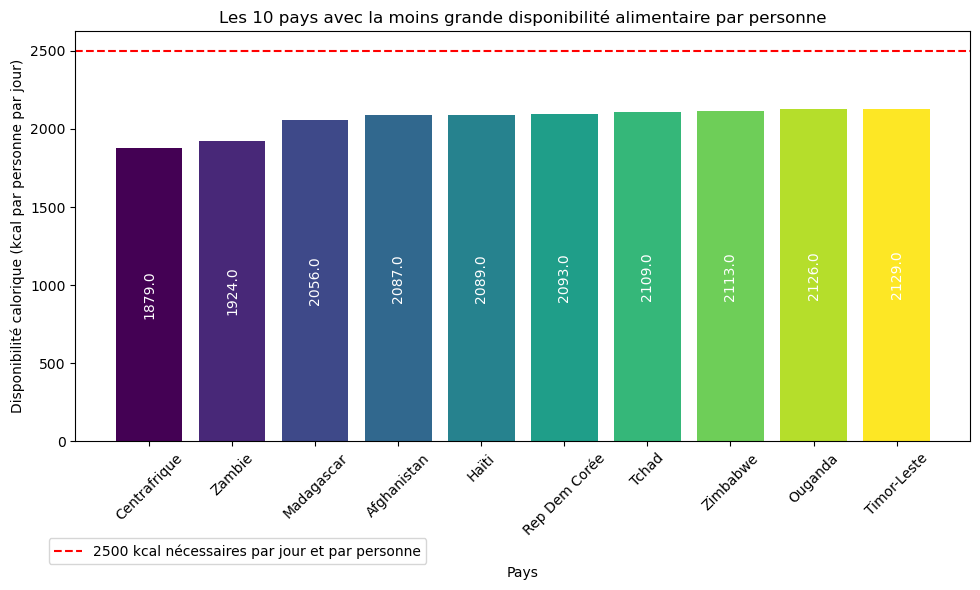

In [373]:
# Tri des 10 pays avec la moins grande disponibilité alimentaire
flop_10_pays = dispo_kcal_par_personne_par_jour_par_pays_filtré.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)
# Préparation des données pour le graphique
noms_pays_moins_dispo = ['Centrafrique', 'Zambie', 'Madagascar', 
                 'Afghanistan', 'Haïti', 'Rep Dem Corée',
                 'Tchad', 'Zimbabwe', 'Ouganda', 'Timor-Leste']
couleurs = plt.cm.viridis(np.linspace(0, 1, len(noms_pays_aides)))

# Création de l'histogramme
plt.figure(figsize=(10, 6))
bars = plt.bar(noms_pays_moins_dispo, flop_10_pays['Disponibilité alimentaire (Kcal/personne/jour)'], color=couleurs)

# Ajout des annotations à l'intérieur des barres
for i in range(len(flop_10_pays)):
    # Pour centrer le texte dans chaque barre, utilisez (y/2)
    plt.text(i, flop_10_pays['Disponibilité alimentaire (Kcal/personne/jour)'].iloc[i] / 2, 
             round(flop_10_pays['Disponibilité alimentaire (Kcal/personne/jour)'].iloc[i], 2), ha='center', va='center', rotation=90, color='white')
# Ajouter la ligne rouge pour la limite des 2500 kcal
plt.axhline(y=2500, color='red', linestyle='--', label='2500 kcal nécessaires par jour et par personne')
# Étiquettes et titre
plt.xlabel('Pays', labelpad=20)
plt.ylabel('Disponibilité calorique (kcal par personne par jour)')
plt.title('Les 10 pays avec la moins grande disponibilité alimentaire par personne')

# Légende
plt.xticks(rotation=(45))  
plt.legend(loc='upper right', bbox_to_anchor=(0.4, -0.22), ncol=1)
plt.tight_layout()  # Ajuste les marges pour éviter que le texte ne soit coupé
plt.savefig('diag_10_moins_alim.png')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [375]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_kcal_par_personne_par_jour_par_pays_filtré.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


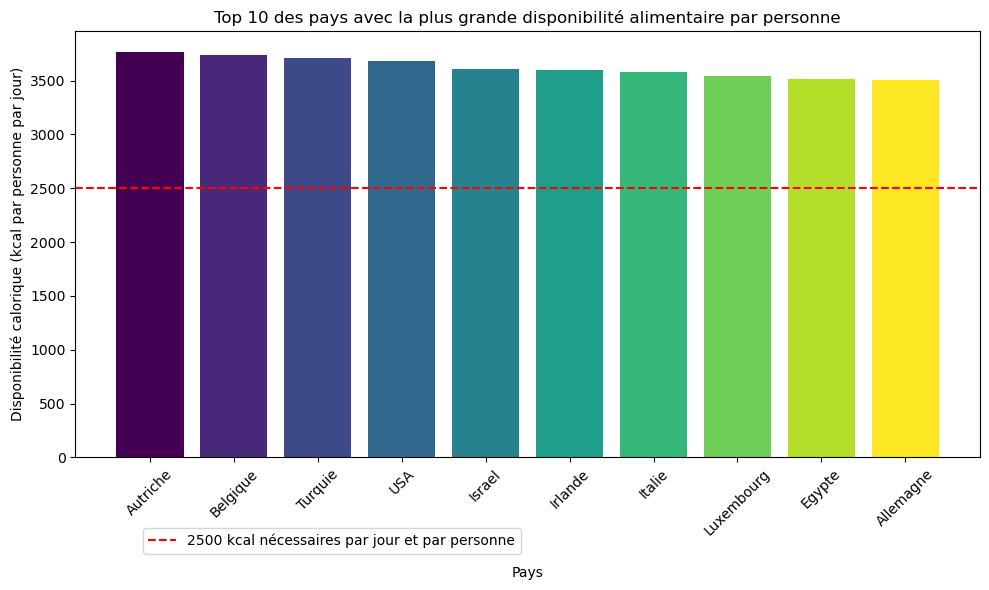

In [376]:
#Préparation des données pour le graphique
top_10_pays = dispo_kcal_par_personne_par_jour_par_pays_filtré.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)
noms_pays_plus_dispo = ['Autriche', 'Belgique', 'Turquie', 
                 'USA', 'Israel', 'Irlande',
                 'Italie', 'Luxembourg', 'Egypte', 'Allemagne']
couleurs = plt.cm.viridis(np.linspace(0, 1, len(noms_pays_plus_dispo)))
# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(noms_pays_plus_dispo, top_10_pays['Disponibilité alimentaire (Kcal/personne/jour)'], color=couleurs)
    
# Ajouter la ligne rouge pour la limite des 2500 kcal
plt.axhline(y=2500, color='red', linestyle='--', label='2500 kcal nécessaires par jour et par personne')

plt.xlabel('Pays', labelpad=20)
plt.ylabel('Disponibilité calorique (kcal par personne par jour)')
plt.title('Top 10 des pays avec la plus grande disponibilité alimentaire par personne')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.xticks(rotation=(45))
plt.tight_layout()
plt.savefig('diag_plus_dispo')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Exemple de la Thaïlande pour le Manioc</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Données de la Thaïlande</h3>
</div>

In [379]:
#Objectif: création d'un dataframe avec uniquement la Thaïlande 
#Jointure entre les dataframes pop_sous_nutr_2017 et aide_alimenatire
pop_sous_nutr_2017_aide = pop_sous_nutr_2017_filtree.merge(aide_alimentaire, on='Zone', how='outer') 
pop_sous_nutr_2017_aide.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays,Année,Produit,Valeur
0,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0
1,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2014.0,Autres non-céréales,335000.0
2,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Blé et Farin,39224000.0
3,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2014.0,Blé et Farin,15160000.0
4,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Céréales,40504000.0


In [380]:
#Affichage des valeurs de la jointure
pop_sous_nutr_2017_aide._merge.value_counts()

_merge
both          1591
left_only        0
right_only       0
Name: count, dtype: int64

In [381]:
#Jointure entre la dataframe précedente et celle concernant la disponibilité alimentaire
Données_globales = pop_sous_nutr_2017_aide.merge(dispo_alimentaire, on='Zone', how='outer')
Données_globales.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays,Année,Produit_x,Valeur,...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [382]:
#Affichage des valeurs de la jointure
Données_globales._merge.value_counts()

_merge
both          122884
left_only          0
right_only         0
Name: count, dtype: int64

In [383]:
#Création d'une data frame avec des données concernant uniquement la Thaïlande
Données_Thai = Données_globales[Données_globales['Zone'] == 'Thaïlande']
Données_Thai.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays,Année,Produit_x,Valeur,...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
111375,Thaïlande,2017.0,69209810.0,2016-2018,6200000.0,both,8.96,NaN,NaN,NaN,...,0.56,74000.0,5000.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0
111376,Thaïlande,2017.0,69209810.0,2016-2018,6200000.0,both,8.96,NaN,NaN,NaN,...,0.00,8000.0,6000.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0
111377,Thaïlande,2017.0,69209810.0,2016-2018,6200000.0,both,8.96,NaN,NaN,NaN,...,0.00,358000.0,110000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0
111378,Thaïlande,2017.0,69209810.0,2016-2018,6200000.0,both,8.96,NaN,NaN,NaN,...,0.08,12000.0,7000.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0
111379,Thaïlande,2017.0,69209810.0,2016-2018,6200000.0,both,8.96,NaN,NaN,NaN,...,0.08,782000.0,1449000.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13000.0


In [384]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(Données_Thai.shape[0]))
print("Le tableau comporte {} colonnes.".format(Données_Thai.shape[1]))

Le tableau comporte 95 observation(s) ou article(s)
Le tableau comporte 27 colonnes.


In [385]:
# Liste des colonnes à afficher
colonnes_a_afficher = ['Zone', 'Année_x', 'Population', 'Sous_nutrition', 'Produit_y', 'Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité', 'Autres Utilisations', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']

# Affichage du DataFrame avec seulement les colonnes sélectionnées
Thaïlande = Données_Thai[colonnes_a_afficher]
Thaïlande.head()

,Zone,Année_x,Population,Sous_nutrition,Produit_y,Aliments pour animaux,Disponibilité intérieure,Exportations - Quantité,Autres Utilisations,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
111375,Thaïlande,2017.0,69209810.0,6200000.0,Abats Comestible,0.0,74000.0,5000.0,0.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0
111376,Thaïlande,2017.0,69209810.0,6200000.0,"Agrumes, Autres",0.0,8000.0,6000.0,0.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0
111377,Thaïlande,2017.0,69209810.0,6200000.0,"Alcool, non Comestible",0.0,358000.0,110000.0,358000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0
111378,Thaïlande,2017.0,69209810.0,6200000.0,Aliments pour enfants,0.0,12000.0,7000.0,0.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0
111379,Thaïlande,2017.0,69209810.0,6200000.0,Ananas,0.0,782000.0,1449000.0,0.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Calcul de la sous nutrition en Thaïlande</h3>
</div>

In [387]:
#Calcul de la sous nutrition en Thaïlande
Sous_nutri_Thaïlande = round((Thaïlande['Sous_nutrition'] / Thaïlande['Population'])*100, 2).unique()
print(Sous_nutri_Thaïlande[0], ' % de la population Thaïlandaise est en état de sous nutrition.')

8.96  % de la population Thaïlandaise est en état de sous nutrition.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.5 - La disponibilité par habitant de la Thaïlande</h3>
</div>

In [389]:
# On filtre le DataFrame pour obtenir les informations sur la disponibilité en Thaïlande
# Liste des colonnes à afficher
colonnes_a_afficher = ['Zone', 'Produit_y', 'Disponibilité alimentaire (Kcal/personne/jour)']
dispo_alim_par_produit_Thaïlande = Données_Thai[colonnes_a_afficher]
dispo_alim_par_produit_Thaïlande.head()

,Zone,Produit_y,Disponibilité alimentaire (Kcal/personne/jour)
111375,Thaïlande,Abats Comestible,3.0
111376,Thaïlande,"Agrumes, Autres",0.0
111377,Thaïlande,"Alcool, non Comestible",0.0
111378,Thaïlande,Aliments pour enfants,2.0
111379,Thaïlande,Ananas,10.0


In [390]:
dispo_alim_par_habitant_Thaïlande = int(dispo_alim_par_produit_Thaïlande['Disponibilité alimentaire (Kcal/personne/jour)'].sum())
print('La disponibilité alimentaire de la Thaïlande en 2017 est de', dispo_alim_par_habitant_Thaïlande, 'Kcal par personne et par jour.')

La disponibilité alimentaire de la Thaïlande en 2017 est de 2785 Kcal par personne et par jour.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3 - Le manioc en Thaïlande</h3>
</div>

In [392]:
# On filtre le DataFrame pour obtenir les informations sur le manioc
# Liste des colonnes à afficher
colonnes_a_afficher = ['Zone', 'Produit_y', 'Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité',
                       'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']
manioc_Thaïlande = Thaïlande[colonnes_a_afficher]
manioc = manioc_Thaïlande.loc[Thaïlande['Produit_y'] == 'Manioc']
manioc.head()

,Zone,Produit_y,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
111425,Thaïlande,Manioc,1800000.0,2081000.0,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [393]:
# On calcule le total en kg de manioc de la Thaïlande
Total_manioc_Thaïlande = int((manioc['Production'].iloc[0] +  manioc['Importations - Quantité'].iloc[0]))
print('La Thaïlande dispose de', Total_manioc_Thaïlande, 'kg de manioc en 2017.')

La Thaïlande dispose de 31478000 kg de manioc en 2017.


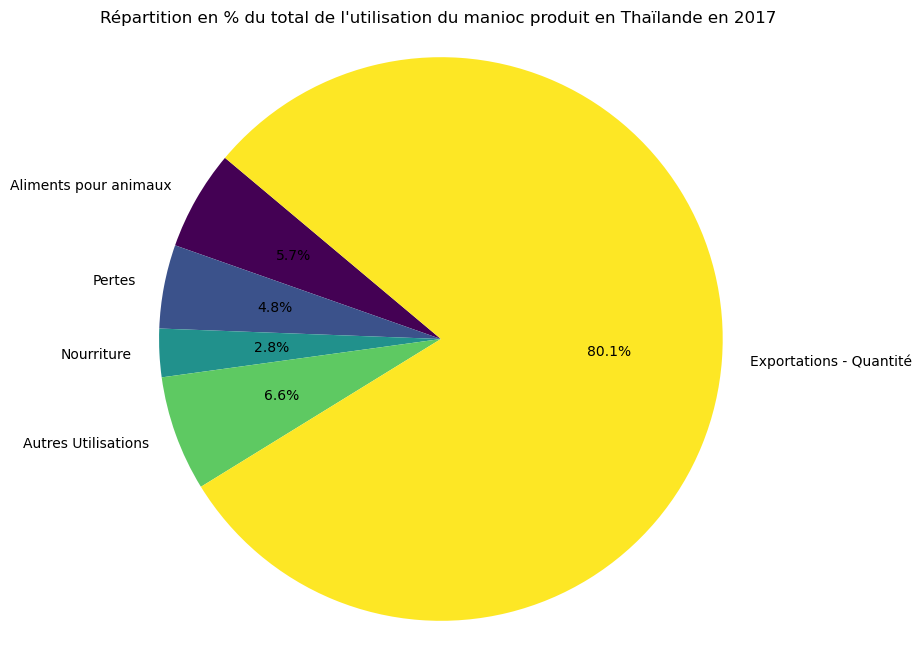

In [394]:
# Création d'un graphique circulaire affichant la répartition du manioc en % en fonction de son utilisation
# Préparation des données
colonnes_cibles = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Exportations - Quantité']
valeurs_disponibles = []
couleurs = plt.cm.viridis(np.linspace(0, 1, len(colonnes_cibles)))

# Accumulation des valeurs et conversion en pourcentage
for part in colonnes_cibles:
    dispo = int(round(manioc[part].sum()))
    valeurs_disponibles.append(dispo)

# Calcul des pourcentages
valeurs_disponibles = [val / Total_manioc_Thaïlande * 100 for val in valeurs_disponibles]

# Création de l'histogramme
plt.figure(figsize=(8, 8))
plt.pie(valeurs_disponibles, labels=colonnes_cibles, autopct='%1.1f%%', startangle=140, colors=couleurs)
plt.axis('equal')  # Assurez-vous que le cercle est dessiné correctement
plt.title("Répartition en % du total de l'utilisation du manioc produit en Thaïlande en 2017 ")
plt.savefig("camembert3.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.4 - L'importance des exportations de manioc depuis la Thaïlande</h3>
</div>

In [396]:
#On calcule la proportion de manioc exporté par rapport au total de manioc 
proportion_manioc_exp = round((manioc['Exportations - Quantité'].iloc[0] / Total_manioc_Thaïlande) *100, 2)
print(proportion_manioc_exp, " % du manioc disponible en Thaïlande en 2017 est exporté.")

80.1  % du manioc disponible en Thaïlande en 2017 est exporté.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.5 - Les pays exportateurs de Manioc</h3>
</div>

In [398]:
#Création d'un data frame concernant le produit manioc au niveau mondial
Données_globales[Données_globales['Produit_y'] == 'Manioc']
Données_globales.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays,Année,Produit_x,Valeur,...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017.0,36296113.0,2016-2018,10500000.0,both,28.93,2013.0,Autres non-céréales,682000.0,...,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [399]:
#afficher les données des pays exportateurs
colonnes_a_afficher = ['Zone', 'Produit_y', 'Exportations - Quantité', 'Importations - Quantité']
pays_export= Données_globales[colonnes_a_afficher]
pays_export.head()

,Zone,Produit_y,Exportations - Quantité,Importations - Quantité
0,Afghanistan,Abats Comestible,0.0,0.0
1,Afghanistan,"Agrumes, Autres",2000.0,40000.0
2,Afghanistan,Aliments pour enfants,0.0,2000.0
3,Afghanistan,Ananas,0.0,0.0
4,Afghanistan,Bananes,0.0,82000.0


In [400]:
#filter les données pour la manioc uniquement
pays_export_manioc = pays_export.loc[pays_export['Produit_y'] == 'Manioc']
pays_export_manioc.head()

,Zone,Produit_y,Exportations - Quantité,Importations - Quantité
1010,Afrique du Sud,Manioc,2000.0,58000.0
1103,Albanie,Manioc,0.0,0.0
1195,Algérie,Manioc,0.0,0.0
1288,Algérie,Manioc,0.0,0.0
1381,Algérie,Manioc,0.0,0.0


In [401]:
#Grouper les données par Zone
pays_export_manioc_totale = pays_export_manioc.groupby('Zone')['Exportations - Quantité'].sum()
pays_export_manioc_totale.head()

Zone
Afrique du Sud     2000.0
Albanie               0.0
Algérie               0.0
Allemagne         14000.0
Angola                0.0
Name: Exportations - Quantité, dtype: float64

In [402]:
#Liste des 5 pays exportant le plus de manioc 
top_5_pays_export_manioc = pays_export_manioc_totale.sort_values(ascending=False)
top_5_pays_export_manioc.head(5)

Zone
Thaïlande    25214000.0
Viet Nam      8973000.0
Cambodge      5842000.0
Ouganda        940000.0
Indonésie      820000.0
Name: Exportations - Quantité, dtype: float64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.5 - Les pays importateurs de Manioc</h3>
</div>

In [404]:
#Liste des 10 pays important le plus de manioc
pays_import_manioc_totale = pays_export_manioc.groupby('Zone')['Importations - Quantité'].sum()
top_10_pays_import_manioc = pays_import_manioc_totale.sort_values(ascending=False)
top_10_pays_import_manioc.head(10)


Zone
Chine, continentale          116184000.0
Philippines                    4968000.0
Bangladesh                     3675000.0
République de Corée            1933000.0
Chine, Taiwan Province de      1324000.0
Thaïlande                      1250000.0
Indonésie                      1102000.0
Rwanda                         1034000.0
Malaisie                        844000.0
Sri Lanka                       648000.0
Name: Importations - Quantité, dtype: float64

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyses complémentaires La situation de l'Afrique</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.1 - La population en Afrique </h3>
</div>

In [407]:
#Pour réaliser un analyse complémentaire sur les données concernant l'Afrique , on crée un data frame à partir d'une liste 
#reprennant les pays africains.
pays_afrique =[
'Afrique du Sud', 'Algérie', 'Angola', 'Bénin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroun',
'Comores', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Égypte',
'Érythrée', 'Eswatini', 'Éthiopie', 'Gabon', 'Gambie', 'Ghana',
'Guinée', 'Guinée équatoriale', 'Guinée-Bissau',
'Kenya', 'Lesotho', 'Libéria',
'Libye', 'Madagascar', 'Malawi', 'Mali', 'Maroc',
'Maurice', 'Mauritanie', 'Mozambique', 'Namibie',
'Niger', 'Nigéria', 'Ouganda',
'République centrafricaine', 'République démocratique du Congo',
'République-Unie de Tanzanie', 'Rwanda',
'Sao Tomé-et-Principe', 'Sénégal', 'Seychelles', 'Sierra Leone',
'Somalie', 'Soudan', 'Soudan du Sud', 'Tchad', 'Togo', 'Tunisie',
'Zambie', 'Zimbabwe'
]
pop_sous_nutr_2017_afrique = pop_sous_nutr_2017_filtree[pop_sous_nutr_2017_filtree['Zone'].isin(pays_afrique)]
# Affichage des 5 premieres lignes
pop_sous_nutr_2017_afrique.head()

,Zone,Année_x,Population,Année_y,Sous_nutrition,_merge,Proportion_par_pays
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,both,5.44
3,Algérie,2017,41389189.0,2016-2018,1300000.0,both,3.14
6,Angola,2017,29816766.0,2016-2018,5800000.0,both,19.45
28,Botswana,2017,2205080.0,2016-2018,500000.0,both,22.67
32,Burkina Faso,2017,19193234.0,2016-2018,3600000.0,both,18.76


In [408]:
#Cacul de la population vivant en Afrique en 2017.
total_population_afrique = int(round(pop_sous_nutr_2017_afrique['Population'].sum()))
print('Il y a',total_population_afrique, 'personnes vivant en Afrique en 2017.')

Il y a 1242534553 personnes vivant en Afrique en 2017.


In [409]:
#proportion de la population mondiale vivant en Afrique.
proportion_pop_afrique = round((total_population_afrique / population_mondiale_2017)*100, 2)
print(proportion_pop_afrique, '% de la population mondiale vit en Afrique en 2017.')

16.47 % de la population mondiale vit en Afrique en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.2 - La sous-nutrition en Afrique </h3>
</div>

In [411]:
#Cacul de la population en état de sous-nutrition  en Afrique en 2017
total_population_afrique_sous_nutri = int(pop_sous_nutr_2017_afrique['Sous_nutrition'].sum())
print('Il y a',total_population_afrique_sous_nutri, 'personnes en état de sous-nutrition vivant en Afrique en 2017.')

Il y a 148600000 personnes en état de sous-nutrition vivant en Afrique en 2017.


In [412]:
# % de la population africaine en état de sous_nutrition:
ratio_pop_sous_nutri_Afrique = round((total_population_afrique_sous_nutri / total_population_afrique) *100, 2)
print('Il y a', ratio_pop_sous_nutri_Afrique,"% de la population d'Afrique est en état de sous-nutrition.")

Il y a 11.96 % de la population d'Afrique est en état de sous-nutrition.


In [413]:
# Proportion de l'Afrique dans la sous-nutrition mondiale
proportion_afrique_sous_nutrition = round(( total_population_afrique_sous_nutri/ total_pop_sous_nutr_2017)*100, 2)
print(proportion_afrique_sous_nutrition, ' % de la population en état de sous-nutrition dans le monde se trouve en Afrique.')

27.74  % de la population en état de sous-nutrition dans le monde se trouve en Afrique.


In [414]:
#classer les pays d'Afrique en fonction du nombre de personnes en sous-nutritition
sous_nutr_afrique = pop_sous_nutr_2017_afrique[['Zone', 'Sous_nutrition']].sort_values(by='Sous_nutrition', ascending=False)
sous_nutr_afrique.head(10)

,Zone,Sous_nutrition
132,Nigéria,22800000.0
222,Éthiopie,21100000.0
166,République-Unie de Tanzanie,13400000.0
96,Kenya,11900000.0
109,Madagascar,10500000.0
126,Mozambique,9400000.0
6,Angola,5800000.0
197,Tchad,5700000.0
189,Soudan,5000000.0
53,Côte d'Ivoire,4900000.0


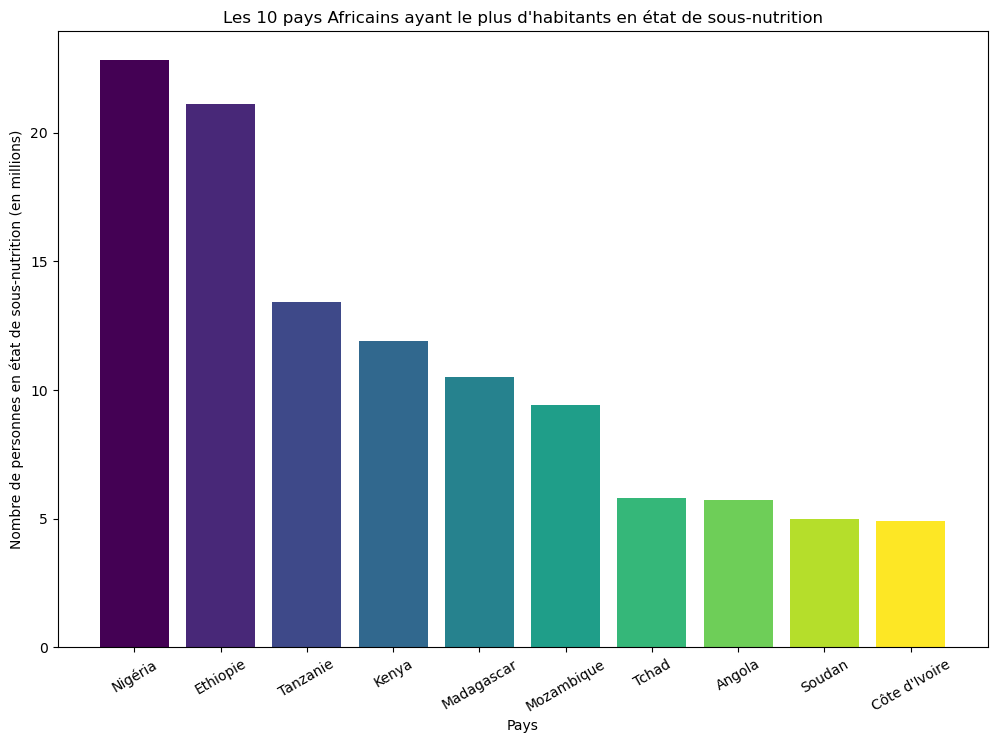

In [415]:
#Création d'un graphique représentant les 10 pays africains ayant le plus d'habitants en état de sous-nutrition en 2017
Top_10_afrique_pop_sous_nutr = sous_nutr_afrique.head(10)
noms_pays_Top10_pop_sous_nutr = ['Nigéria', 'Ethiopie', 'Tanzanie', 
                 'Kenya', 'Madagascar', 'Mozambique',
                 'Tchad', 'Angola', 'Soudan', "Côte d'Ivoire"]
nombre_en_millions = Top_10_afrique_pop_sous_nutr['Sous_nutrition'] / 1_000_000
couleurs = plt.cm.viridis(np.linspace(0, 1, len(Top_10_afrique_pop_sous_nutr)))
plt.figure(figsize=(12, 8))
plt.bar(noms_pays_Top10_pop_sous_nutr, nombre_en_millions, color=couleurs)
plt.title("Les 10 pays Africains ayant le plus d'habitants en état de sous-nutrition")
plt.xlabel('Pays')
plt.ylabel('Nombre de personnes en état de sous-nutrition (en millions)')
plt.xticks(rotation=30)
plt.savefig("Diag_top_10_sous_nutr_afrique_pop.png")
plt.show()

In [416]:
#Classer les pays d'Afrique en fonction de leur proportion de la population en état de sous-nutrition
proportion_sous_nutr_pays_afrique = pop_sous_nutr_2017_afrique[['Zone', 'Proportion_par_pays']].sort_values(by='Proportion_par_pays', ascending=False)
proportion_sous_nutr_pays_afrique.head(10)


,Zone,Proportion_par_pays
109,Madagascar,41.06
104,Libéria,38.28
100,Lesotho,38.25
197,Tchad,37.96
157,Rwanda,35.06
126,Mozambique,32.81
48,Congo,27.39
183,Sierra Leone,26.71
166,République-Unie de Tanzanie,24.52
96,Kenya,23.70


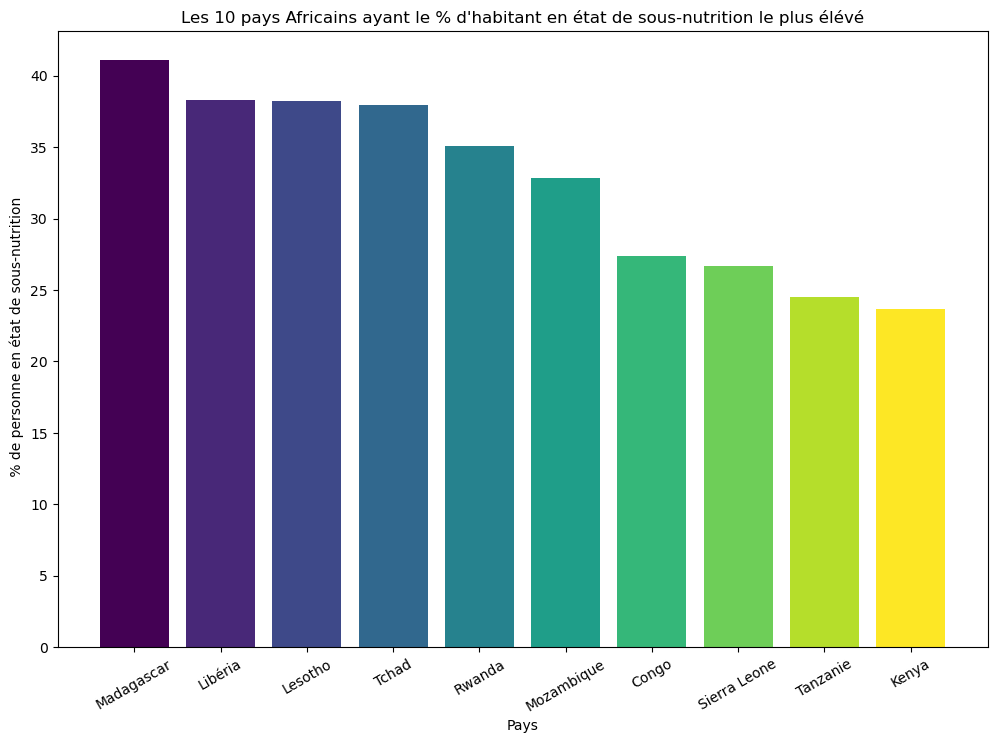

In [417]:
#Création d'un graphique représentant les 10 pays africains ayant la proportion de population  en état de sous-nutrition la plus élevé en 2017.
Top_10_afrique_ratio_pop_sous_nutr = proportion_sous_nutr_pays_afrique.head(10)
noms_pays_Top10_ratio_pop_sous_nutr = ['Madagascar', 'Libéria', 'Lesotho', 'Tchad',
                 'Rwanda', 'Mozambique',
                 'Congo', 'Sierra Leone', 'Tanzanie', 'Kenya']
couleurs = plt.cm.viridis(np.linspace(0, 1, len(Top_10_afrique_ratio_pop_sous_nutr)))

plt.figure(figsize=(12, 8))
plt.bar(noms_pays_Top10_ratio_pop_sous_nutr, Top_10_afrique_ratio_pop_sous_nutr['Proportion_par_pays'], color=couleurs)
plt.title("Les 10 pays Africains ayant le % d'habitant en état de sous-nutrition le plus élévé")
plt.xlabel('Pays')
plt.ylabel(' % de personne en état de sous-nutrition')
plt.xticks(rotation=30)
plt.savefig("Diag_top_10_ratio_sous_nutr_afrique_pop.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.3 - La disponibilité alimentaire en Afrique </h3>
</div>

In [419]:
# Prendre en compte uniquement les pays d'Afrique
dispo_alim_pop_pays_afrique = dispo_alim_pop_filtree[dispo_alim_pop_filtree['Zone'].isin(pays_afrique)]
#Calculer la dispo kcal par jour et par personne pour chaque pays d'Afrique
dispo_kcal_par_personne_par_jour_par_pays_afrique = dispo_alim_pop_pays_afrique.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

In [420]:
# Calcul du nombre médian de Kcal disponibles en Afrique par jour et par personne en 2017.
mediane_afrique= round(dispo_kcal_par_personne_par_jour_par_pays_afrique['Disponibilité alimentaire (Kcal/personne/jour)'].median())
print('Le nombre médian de Kcal disponibles en Afrique par jour et par personne en 2017 est de', mediane_afrique, 'Kcal.')

Le nombre médian de Kcal disponibles en Afrique par jour et par personne en 2017 est de 2453 Kcal.


In [421]:
#Calcul du nombre médian de Kcal disponibles par jour et par personne dans le monde en 2017.
dispo_alim_pop_mondiale_par_pays = dispo_alim_pop_filtree.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
mediane_monde= round(dispo_alim_pop_mondiale_par_pays['Disponibilité alimentaire (Kcal/personne/jour)'].median())
print('Le nombre médian de Kcal disponibles dans le monde par jour et par personne en 2017 est de', mediane_monde, 'Kcal.')

Le nombre médian de Kcal disponibles dans le monde par jour et par personne en 2017 est de 2830 Kcal.


In [422]:
#Classer et afficher les 10 pays d'Afrique avec les plus grandes disponibilités alimentaires en 2017
classement_pays_afrique_dispo_alim = dispo_kcal_par_personne_par_jour_par_pays_afrique[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
classement_pays_afrique_dispo_alim.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
43,Égypte,3518.0
23,Maroc,3402.0
40,Tunisie,3349.0
1,Algérie,3293.0
24,Maurice,3067.0
0,Afrique du Sud,3020.0
14,Ghana,3014.0
22,Mali,2887.0
25,Mauritanie,2875.0
12,Gabon,2826.0


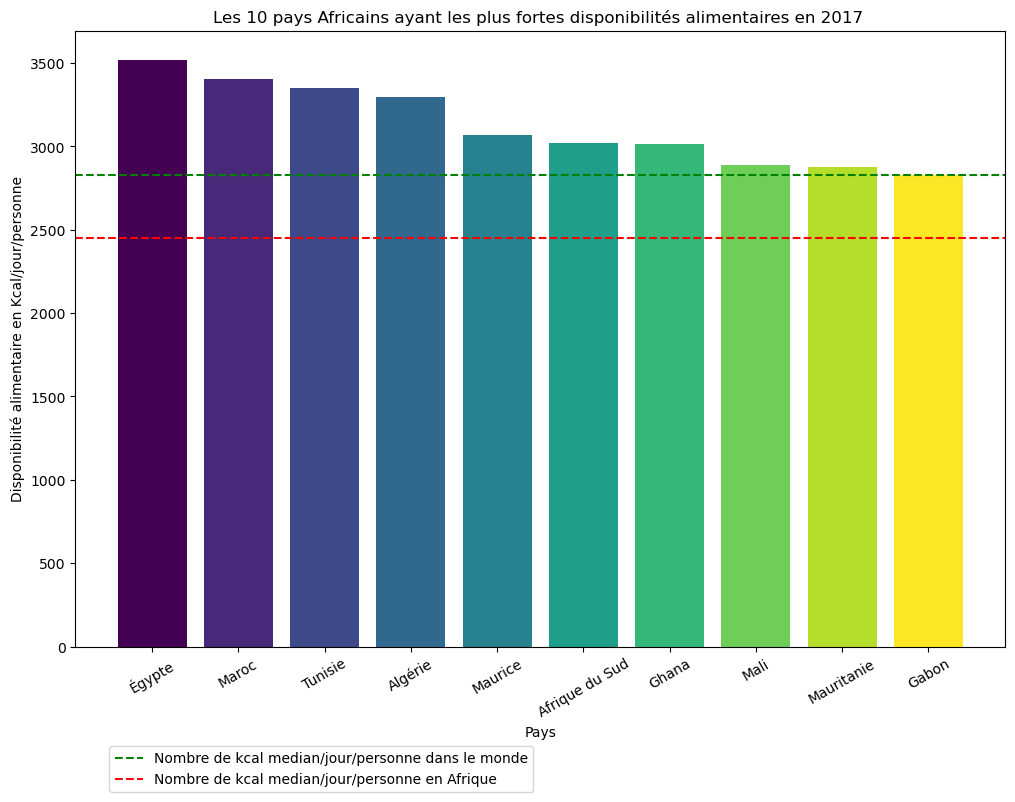

In [423]:
# Création d'un diagramme représentant les 10 pays africains qui disposent des plus fortes disponibilités alimentaires.
Top_10_afrique_dispo_alim = classement_pays_afrique_dispo_alim.head(10)
couleurs = plt.cm.viridis(np.linspace(0, 1, len(Top_10_afrique_dispo_alim)))
plt.figure(figsize=(12, 8))
# Ajouter la ligne verte pour représenter la médiane monde.
plt.axhline(y=2830, color='green', linestyle='--', label='Nombre de kcal median/jour/personne dans le monde')
# Ajouter la ligne rouge pour représenter la médiane africaine.
plt.axhline(y=2453, color='red', linestyle='--', label='Nombre de kcal median/jour/personne en Afrique')
plt.bar(Top_10_afrique_dispo_alim['Zone'], Top_10_afrique_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] , color=couleurs)
plt.title("Les 10 pays Africains ayant les plus fortes disponibilités alimentaires en 2017 ")
plt.xlabel('Pays')
plt.ylabel("Disponibilité alimentaire en Kcal/jour/personne")
plt.xticks(rotation=30)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.savefig("Diag_top_10-dispo_alim_afrique.png")
plt.show()

In [424]:
#Classer et afficher les 10 pays d'Afrique ayant les plus petites disponibilités alimentaires en 2017
classement_pays_afrique_moins_dispo_alim = dispo_kcal_par_personne_par_jour_par_pays_afrique[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
classement_pays_afrique_moins_dispo_alim.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
32,République centrafricaine,1879.0
41,Zambie,1924.0
20,Madagascar,2056.0
38,Tchad,2109.0
42,Zimbabwe,2113.0
30,Ouganda,2126.0
44,Éthiopie,2129.0
27,Namibie,2166.0
33,République-Unie de Tanzanie,2204.0
17,Kenya,2205.0


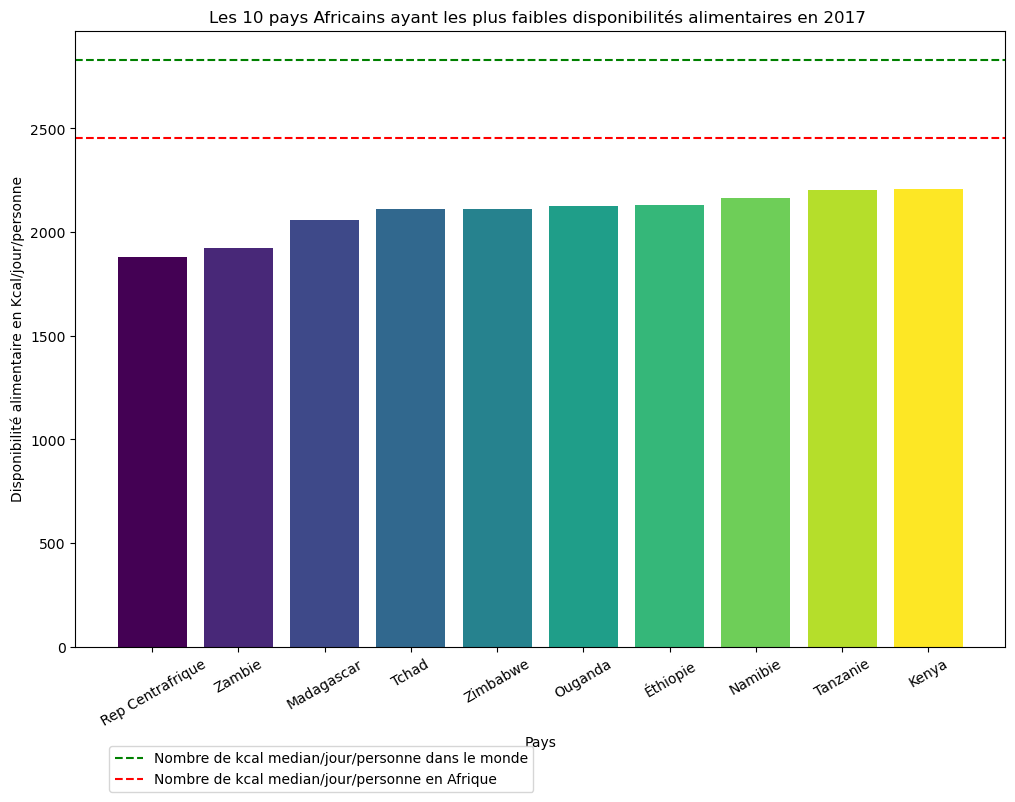

In [542]:
# Création d'un diagramme représentant les 10 pays africains qui disposent des plus faibles disponibilités alimentaires.
Flop_10_afrique_dispo_alim = classement_pays_afrique_moins_dispo_alim.head(10)
noms_pays_Flop10_afrique_dispo_alim = [' Rep Centrafrique', 'Zambie', 'Madagascar', 
                 'Tchad', 'Zimbabwe', 'Ouganda',
                 'Éthiopie', 'Namibie', 'Tanzanie', 'Kenya']
couleurs = plt.cm.viridis(np.linspace(0, 1, len(Top_10_afrique_dispo_alim)))
plt.figure(figsize=(12, 8))
# Ajouter la ligne verte pour la médiane monde
plt.axhline(y=2830, color='green', linestyle='--', label='Nombre de kcal median/jour/personne dans le monde')
# Ajouter la ligne rouge pour la médiane africaine
plt.axhline(y=2453, color='red', linestyle='--', label='Nombre de kcal median/jour/personne en Afrique')
plt.bar(noms_pays_Flop10_afrique_dispo_alim, Flop_10_afrique_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] , color=couleurs)
plt.title("Les 10 pays Africains ayant les plus faibles disponibilités alimentaires en 2017 ")
plt.xlabel('Pays')
plt.ylabel("Disponibilité alimentaire en Kcal/jour/personne")
plt.xticks(rotation=30)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.savefig("Diag_flop_10_dispo_alim_afrique.png")
plt.show()